<img src=images/MIT_logo.jpg width=150 align=right />

# DESIGNING AND BUILDING AI PRODUCTS AND SERVICES

# Marketplace Frontiers of AI Design: Practice

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Dataset

In [2]:
n = 1000
x = np.sort(np.random.uniform(0, np.pi*1.5, size=n))
y = np.sin(x) + np.random.normal(size=n) * 0.3

## Concept (model) drift
The relationship between predictors and target variable changes over time so an old model no longer performs as it used to.
- A gradual change over time.
- A recurring or cyclical change.
- A sudden or abrupt change.

In other domains, this change maybe called “covariate shift,” “dataset shift,” or “non-stationarity.”

Recommended reading: [A Gentle Introduction to Concept Drift in Machine Learning](https://machinelearningmastery.com/gentle-introduction-concept-drift-machine-learning/), in Machine Learning Mastery by Jason Brownlee.

In [3]:
from sklearn.linear_model import LinearRegression

# Model trained on the original period.
model = LinearRegression().fit(x[:300].reshape(-1, 1), y[:300])

# Performance on the original period.
scores = []
scores.append(model.score(x[:300].reshape(-1, 1), y[:300]))
scores[0]

0.43214335603507625

In [4]:
# Performance of subsequent periods.
for i in range(300, 1000, 100):
    scores.append(model.score(x[i:i+100].reshape(-1, 1), y[i:i+100]))

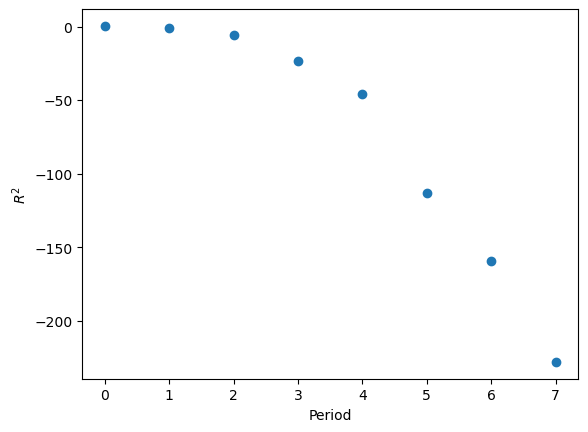

In [5]:
plt.scatter(range(len(scores)), scores)

plt.xlabel('Period')
plt.ylabel('$R^2$')
plt.show()

### Retraining the model
At every period, we will retrain the model by adding new data to the dataset.

In [6]:
# Model trained on the original period.
model = LinearRegression().fit(x[:300].reshape(-1, 1), y[:300])

# Performance on the original period.
scores = []
scores.append(model.score(x[:300].reshape(-1, 1), y[:300]))

# Performance of subsequent periods.
for i in range(300, 1000, 100):
    scores.append(model.score(x[i:i+100].reshape(-1, 1), y[i:i+100]))
    model = LinearRegression().fit(x[:i+100].reshape(-1, 1), y[:i+100])

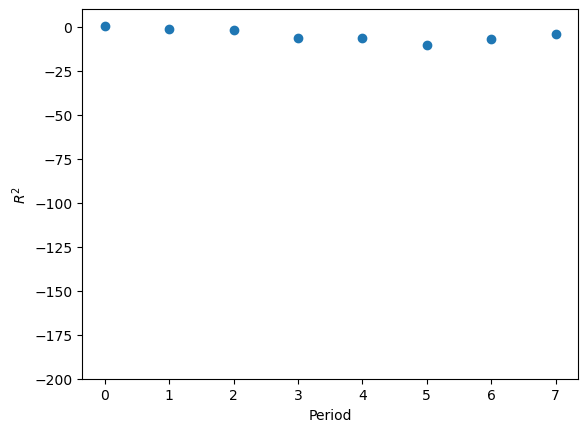

In [8]:
plt.scatter(range(len(scores)), scores)

plt.ylim(-200, 10)
plt.xlabel('Period')
plt.ylabel('$R^2$')
plt.show()

Now, at every period, we will retrain the model by adding new data to _and_ removing old data from the dataset. This means that we always make predictions with a model that is trained on relatively recent data.

In [9]:
# Model trained on the original period.
model = LinearRegression().fit(x[:300].reshape(-1, 1), y[:300])

# Performance on the original period.
scores = []
scores.append(model.score(x[:300].reshape(-1, 1), y[:300]))

# Performance of subsequent periods.
for i in range(300, 1000, 100):
    scores.append(model.score(x[i:i+100].reshape(-1, 1), y[i:i+100]))
    model = LinearRegression().fit(x[i:i+100].reshape(-1, 1), y[i:i+100])

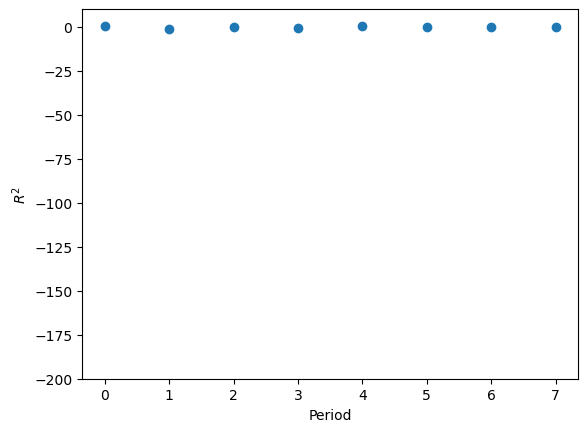

In [11]:
plt.scatter(range(len(scores)), scores)

plt.ylim(-200, 10)
plt.xlabel('Period')
plt.ylabel('$R^2$')
plt.show()

### Revealing the underlying data

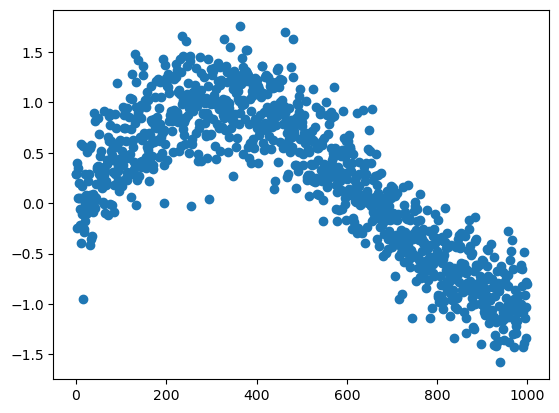

In [12]:
plt.scatter(range(n), y)
plt.show()